In [1]:
!pip install rdkit-pypi==2022.9.5


In [2]:
!pip install rdkit-pypi


In [3]:
!pip install numpy==1.26.4


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import MolsToGridImage


In [5]:
df = pd.read_csv("250k_rndm_zinc_drugs_clean_3.csv")
display(df)
df['smiles'] = df['smiles'].apply(lambda s: s.replace('\n', ''))
zinc_df = df.copy()
display(zinc_df)

,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182
...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc...,3.36790,0.745901,2.900726
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1\n,2.90054,0.878086,1.840642
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1\n,2.55624,0.852917,2.024638


,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182
...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21,3.36790,0.745901,2.900726
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1,2.90054,0.878086,1.840642
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1,2.55624,0.852917,2.024638


SMILES:	Cc1cn2c(CN(C)C(=O)c3ccc(F)cc3C)c(C)nc2s1
Molecule graph:


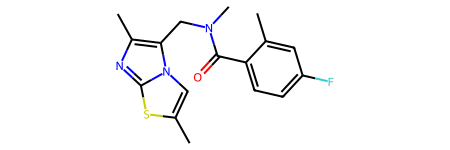

In [6]:
smiles1 = 'Cc1cn2c(CN(C)C(=O)c3ccc(F)cc3C)c(C)nc2s1'
print(f"SMILES:\t{smiles1}")
molecule = Chem.MolFromSmiles(smiles1)
print("Molecule graph:")
molecule

SMILES:	Cc1cc(F)ccc1C(=O)N(C)Cc1c(C)nc2scc(C)n12
Molecule graph:


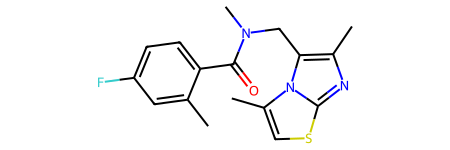

In [7]:
smiles2 = 'Cc1cc(F)ccc1C(=O)N(C)Cc1c(C)nc2scc(C)n12'
print(f"SMILES:\t{smiles2}")
molecule = Chem.MolFromSmiles(smiles2)
print("Molecule graph:")
molecule

SMILES:	COc1ccc([C@H]2C[C@@H](C(F)(F)F)n3nc(C(=O)NC4CCCCC4)cc3N2)cc1OC
Molecule graph:


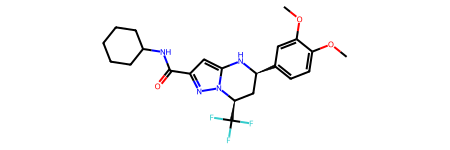

In [8]:
smiles3 = 'COc1ccc([C@H]2C[C@@H](C(F)(F)F)n3nc(C(=O)NC4CCCCC4)cc3N2)cc1OC'
print(f"SMILES:\t{smiles3}")
molecule = Chem.MolFromSmiles(smiles3)
print("Molecule graph:")
molecule

In [9]:
from rdkit.Chem import rdFingerprintGenerator
fpgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=2048,countSimulation=False)
fp1 = fpgen.GetFingerprint(Chem.MolFromSmiles(smiles1))
fp2 = fpgen.GetFingerprint(Chem.MolFromSmiles(smiles2))
fp3 = fpgen.GetFingerprint(Chem.MolFromSmiles(smiles3))
fingerprint = fp1.ToList()
print(fingerprint)

[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 

In [10]:
!pip install scipy


In [11]:
from scipy.spatial import distance
from rdkit import DataStructs
print(DataStructs.TanimotoSimilarity(fp1,fp2))
print(DataStructs.TanimotoSimilarity(fp1,fp3))
print(DataStructs.TanimotoSimilarity(fp2,fp3))

0.890926640926641
0.4024316109422492
0.4054711246200608


smiles:CC[NH+](CC)[C@](C)(CC)[C@H](O)c1cscc1Br
Graph


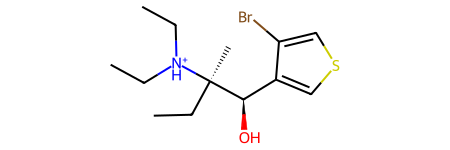

MolBlock

     RDKit          2D

 17 17  0  0  0  0  0  0  0  0999 V2000
    4.2760   -5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5260   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2760   -2.5981    0.0000 N   0  0  0  0  0  4  0  0  0  0  0  0
    5.7760   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.5260   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5260   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2269   -2.0490    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.8250   -0.5490    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1241   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7760    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5260    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2760    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943    1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323    0.

In [12]:
smile = 'CC[NH+](CC)[C@](C)(CC)[C@H](O)c1cscc1Br'
m1 = Chem.MolFromSmiles(smile)
print(f'smiles:{smile}')
print(f'Graph')
display(m1)
print(f'MolBlock')
print(Chem.MolToMolBlock(m1))

In [13]:
import py3Dmol
# AllChem.EmbedMolecule(m1, randomSeed =2014)
p = py3Dmol.view(width=400, height=400)
p.removeAllModels()
p.addModel(Chem.MolToMolBlock(m1),'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [14]:
AllChem.EmbedMolecule(m1, randomSeed =2014) # calculate 3D coordinate
print(Chem.MolToMolBlock(m1))


     RDKit          3D

 17 17  0  0  0  0  0  0  0  0999 V2000
   -3.0686   -0.1573    1.9377 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1347   -0.7910    0.5783 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0784   -0.4529   -0.2902 N   0  0  0  0  0  4  0  0  0  0  0  0
   -2.2423    0.6492   -1.1360 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1055    1.7544   -0.6351 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7578   -0.6023    0.3029 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.2835   -1.9919    0.3084 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6615    0.1290    1.6411 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9294    1.6086    1.2968 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1733    0.3577   -0.6037 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.0222   -0.3807   -1.8900 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5929   -0.2959   -0.2197 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8377   -1.4201    0.2605 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6286   -1.4842    0

[00:55:27] Molecule does not have explicit Hs. Consider calling AddHs()


In [15]:
p = py3Dmol.view(width=400, height=400)
p.removeAllModels()
p.addModel(Chem.MolToMolBlock(m1),'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
AllChem.EmbedMolecule(m1, randomSeed =184)
p = py3Dmol.view(width=400, height=400)
p.removeAllModels()
p.addModel(Chem.MolToMolBlock(m1),'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

[00:57:36] Molecule does not have explicit Hs. Consider calling AddHs()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
# Subset only first 10 molecules for testing
smiles_list = df['smiles'][:10].tolist()

graphs = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    graph = smiles_to_bigraph(smi, add_self_loop=True)
    graphs.append(graph)

save_graphs('zinc250k_graphs_sample.bin', graphs)


NameError: name 'smiles_to_bigraph' is not defined

In [22]:
from dgl.data.utils import load_graphs

graphs, _ = load_graphs('zinc250k_graphs_sample.bin')
print(f"Number of graphs loaded: {len(graphs)}")
print("Sample graph:", graphs[0])


Number of graphs loaded: 10
Sample graph: Graph(num_nodes=24, num_edges=76,
      ndata_schemes={}
      edata_schemes={})


In [23]:
 # Prepare a Label (Target) for Each Graph
print(df.columns)



Index(['smiles', 'logP', 'qed', 'SAS'], dtype='object')


In [24]:
import pandas as pd
from dgl.data.utils import load_graphs

# Load your CSV and graphs
df = pd.read_csv('250k_rndm_zinc_drugs_clean_3.csv')
graphs, _ = load_graphs('zinc250k_graphs_sample.bin')

# Use only the first 10 to match saved graphs
df = df.iloc[:10]
labels = df['logP'].values  # Pick 'logP' as regression target


In [25]:
import torch

for g in graphs:
    num_nodes = g.num_nodes()
    g.ndata['h'] = torch.ones(num_nodes, 10)  # Dummy 10-dimensional feature


In [26]:
from torch.utils.data import Dataset

class MoleculeGraphDataset(Dataset):
    def __init__(self, graphs, labels):
        self.graphs = graphs
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx], self.labels[idx]

dataset = MoleculeGraphDataset(graphs, labels)


In [27]:
import torch.nn as nn
import dgl
from dgl.nn.pytorch import GraphConv

class GCNRegressor(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GCNRegressor, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_feats)
        self.conv2 = GraphConv(hidden_feats, hidden_feats)
        self.readout = nn.Linear(hidden_feats, out_feats)

    def forward(self, g, features):
        x = self.conv1(g, features)
        x = torch.relu(x)
        x = self.conv2(g, x)
        g.ndata['h'] = x
        hg = dgl.mean_nodes(g, 'h')  # global readout
        return self.readout(hg)


In [28]:
from torch.utils.data import DataLoader

model = GCNRegressor(in_feats=10, hidden_feats=64, out_feats=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

loader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=lambda x: zip(*x))

for epoch in range(50):
    model.train()
    total_loss = 0
    for batch_graphs, batch_labels in loader:
        batch_graphs = list(batch_graphs)
        batch_labels = torch.stack(list(batch_labels))
        
        batched_graph = dgl.batch(batch_graphs)
        feats = torch.cat([g.ndata['h'] for g in batch_graphs])
        
        preds = model(batched_graph, feats)
        loss = loss_fn(preds, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch {epoch:02d} - Loss: {total_loss:.4f}")


Epoch 00 - Loss: 20.1158
Epoch 01 - Loss: 5.2673
Epoch 02 - Loss: 7.6539
Epoch 03 - Loss: 6.6149
Epoch 04 - Loss: 9.5860
Epoch 05 - Loss: 5.7415
Epoch 06 - Loss: 6.5144
Epoch 07 - Loss: 6.3496
Epoch 08 - Loss: 7.0748
Epoch 09 - Loss: 6.3813
Epoch 10 - Loss: 7.1264
Epoch 11 - Loss: 6.6278
Epoch 12 - Loss: 6.9813
Epoch 13 - Loss: 5.1242
Epoch 14 - Loss: 6.8734
Epoch 15 - Loss: 5.6622
Epoch 16 - Loss: 6.6040
Epoch 17 - Loss: 5.3668
Epoch 18 - Loss: 6.5771
Epoch 19 - Loss: 6.6831
Epoch 20 - Loss: 6.4503
Epoch 21 - Loss: 6.1727
Epoch 22 - Loss: 6.0756
Epoch 23 - Loss: 7.6323
Epoch 24 - Loss: 7.9835
Epoch 25 - Loss: 5.7249
Epoch 26 - Loss: 6.8359
Epoch 27 - Loss: 7.5669
Epoch 28 - Loss: 6.0308
Epoch 29 - Loss: 5.5421
Epoch 30 - Loss: 7.1524
Epoch 31 - Loss: 7.0487
Epoch 32 - Loss: 7.0264
Epoch 33 - Loss: 5.5180
Epoch 34 - Loss: 5.2111
Epoch 35 - Loss: 6.0370
Epoch 36 - Loss: 5.6348
Epoch 37 - Loss: 7.6188
Epoch 38 - Loss: 5.8238
Epoch 39 - Loss: 6.7255
Epoch 40 - Loss: 6.3449
Epoch 41 - Loss

In [29]:
#Evaluate Accuracy: MAE & R²
from sklearn.metrics import mean_absolute_error, r2_score

model.eval()
true_vals = []
pred_vals = []

for graph, label in dataset:
    graph = graph
    feat = graph.ndata['h']
    with torch.no_grad():
        pred = model(graph, feat)
    true_vals.append(label.item())
    pred_vals.append(pred.item())

print("MAE:", mean_absolute_error(true_vals, pred_vals))
print("R² Score:", r2_score(true_vals, pred_vals))


MAE: 1.2467484831809998
R² Score: -0.05875687050394518


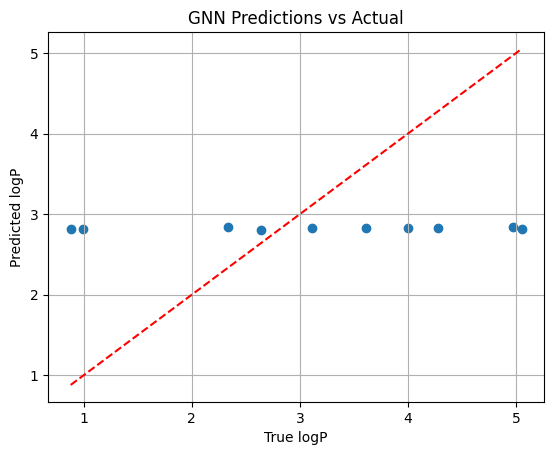

In [30]:
import matplotlib.pyplot as plt

plt.scatter(true_vals, pred_vals)
plt.plot([min(true_vals), max(true_vals)], [min(true_vals), max(true_vals)], 'r--')  # y=x line
plt.xlabel("True logP")
plt.ylabel("Predicted logP")
plt.title("GNN Predictions vs Actual")
plt.grid(True)
plt.show()


In [31]:
from dgllife.utils import CanonicalAtomFeaturizer
atom_featurizer = CanonicalAtomFeaturizer()

from dgllife.utils import smiles_to_bigraph

# Rebuild graph with atom features
graphs = []
for smi in df['smiles'][:10]:
    g = smiles_to_bigraph(smi, add_self_loop=True, node_featurizer=atom_featurizer)
    graphs.append(g)


In [32]:
df = pd.read_csv('250k_rndm_zinc_drugs_clean_3.csv')
smiles_list = df['smiles'][:100].tolist()
logp_list = df['logP'][:100].tolist()


In [33]:
from dgllife.utils import smiles_to_bigraph
from dgllife.utils.featurizers import CanonicalAtomFeaturizer, CanonicalBondFeaturizer
from tqdm import tqdm

# Define featurizers
atom_featurizer = CanonicalAtomFeaturizer()
bond_featurizer = CanonicalBondFeaturizer()

# Generate graphs with features
graphs = []
valid_logp = []

for smi, logp in tqdm(zip(smiles_list, logp_list), total=len(smiles_list)):
    try:
        g = smiles_to_bigraph(smi, 
                              add_self_loop=True, 
                              node_featurizer=atom_featurizer, 
                              edge_featurizer=bond_featurizer)
        graphs.append(g)
        valid_logp.append(logp)
    except:
        continue  # skip invalid SMILES if any


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 167.16it/s]


In [34]:
from torch.utils.data import Dataset

class MoleculeGraphDataset(Dataset):
    def __init__(self, graphs, labels):
        self.graphs = graphs
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx], self.labels[idx]

dataset = MoleculeGraphDataset(graphs, valid_logp)


In [35]:
print("Number of valid graphs:", len(graphs))


Number of valid graphs: 0


In [36]:
print(smiles_list[:5])


['CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n', 'C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n', 'N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1\n', 'CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c2CCCCC3)C1\n', 'N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#N)C12CCCCC2\n']


In [37]:
smiles_list = [smi.strip() for smi in smiles_list]


In [38]:
from tqdm import tqdm
from dgllife.utils import smiles_to_bigraph
from dgllife.utils.featurizers import CanonicalAtomFeaturizer, CanonicalBondFeaturizer

# Clean the SMILES strings
smiles_list = [s.strip() for s in smiles_list]

atom_f = CanonicalAtomFeaturizer()
bond_f = CanonicalBondFeaturizer()

graphs = []
valid_logp = []

for smi, logp in tqdm(zip(smiles_list, logp_list), total=len(smiles_list)):
    try:
        g = smiles_to_bigraph(smi, 
                              add_self_loop=True,
                              node_featurizer=atom_f,
                              edge_featurizer=bond_f)
        graphs.append(g)
        valid_logp.append(logp)
    except Exception as e:
        print(f"Skipped: {smi} -> {e}")
        continue

print("Number of valid graphs:", len(graphs))


 11%|████████▊                                                                       | 11/100 [00:00<00:00, 105.96it/s]

Skipped: CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1 -> Expect number of features to match number of edges. Got 52 and 76 instead.
Skipped: C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1 -> Expect number of features to match number of edges. Got 46 and 67 instead.
Skipped: N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1 -> Expect number of features to match number of edges. Got 64 and 93 instead.
Skipped: CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c2CCCCC3)C1 -> Expect number of features to match number of edges. Got 66 and 96 instead.
Skipped: N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#N)C12CCCCC2 -> Expect number of features to match number of edges. Got 60 and 88 instead.
Skipped: CC[NH+](CC)[C@](C)(CC)[C@H](O)c1cscc1Br -> Expect number of features to match number of edges. Got 34 and 51 instead.
Skipped: COc1ccc(C(=O)N(C)[C@@H](C)C/C(N)=N/O)cc1O -> Expect number of features to match number of edges. Got 40 and 60 instead.
Skipped: O=C(Nc1nc[nH]n1)c1cccnc1Nc1cccc(F)c1 -> Expect

 39%|███████████████████████████████▏                                                | 39/100 [00:00<00:00, 113.69it/s]

Skipped: CC(C)Cc1nc(SCC(=O)NC[C@@H]2CCCO2)c2c(=O)n(C)c(=O)n(C)c2n1 -> Expect number of features to match number of edges. Got 62 and 91 instead.
Skipped: Cc1ccc(CNC(=O)c2ccccc2NC(=O)[C@@H]2CC(=O)N(c3ccc(C)cc3)C2)cc1 -> Expect number of features to match number of edges. Got 72 and 105 instead.
Skipped: CCCCC(=O)NC(=S)Nc1ccccc1C(=O)N1CCOCC1 -> Expect number of features to match number of edges. Got 50 and 74 instead.
Skipped: Cc1c(NC(=O)CSc2nc3sc4c(c3c(=O)[nH]2)CCCC4)c(=O)n(-c2ccccc2)n1C -> Expect number of features to match number of edges. Got 74 and 107 instead.
Skipped: CC(C)[C@@H](Oc1cccc(Cl)c1)C(=O)N1CCC(n2cccn2)CC1 -> Expect number of features to match number of edges. Got 54 and 79 instead.
Skipped: CCN(CC)C(=O)C[C@@H](C)[NH2+][C@H](C)c1cccc(F)c1F -> Expect number of features to match number of edges. Got 42 and 63 instead.
Skipped: Cc1nc2c(c(Nc3ncc(C)s3)n1)CCN(C(=O)CCc1ccccc1)C2 -> Expect number of features to match number of edges. Got 62 and 90 instead.
Skipped: O=C(NCCNC(=O)

 75%|████████████████████████████████████████████████████████████                    | 75/100 [00:00<00:00, 148.97it/s]

Skipped: CCn1cc(C(=O)N[C@H]2CC(=O)N(C)C2)c(C(C)C)n1 -> Expect number of features to match number of edges. Got 42 and 62 instead.
Skipped: COc1cccc(-c2cncc3ccccc23)c1C(=O)N(C(C)C)C(C)C -> Expect number of features to match number of edges. Got 58 and 85 instead.
Skipped: COc1ccc([C@@H](C)NC(=O)Cc2cccc3ccccc23)cc1 -> Expect number of features to match number of edges. Got 52 and 76 instead.
Skipped: O=C1C[C@H](c2nc(-c3cccnc3)no2)CN1c1cccc(Cl)c1 -> Expect number of features to match number of edges. Got 54 and 78 instead.
Skipped: C[C@H]1CCCN(c2ccc(C(=O)Nc3ccc(N4CCOCC4)cc3)cc2[N+](=O)[O-])C1 -> Expect number of features to match number of edges. Got 68 and 99 instead.
Skipped: C=CCN(C(=O)C/C=C/c1ccc(C)cc1)[C@@H]1CCS(=O)(=O)C1 -> Expect number of features to match number of edges. Got 48 and 71 instead.
Skipped: O=C(CSc1nnc(-c2cccc([N+](=O)[O-])c2)o1)Nc1nncs1 -> Expect number of features to match number of edges. Got 52 and 76 instead.
Skipped: CN(CCc1ccc(F)cc1)c1cc(Br)cc(F)c1C(N)=O -> Ex

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 139.71it/s]

Skipped: C[C@H](OC(=O)c1nc(C2CC2)n2ccccc12)c1cnc2ccccc2c1 -> Expect number of features to match number of edges. Got 62 and 89 instead.
Skipped: CCCCOc1ccccc1C[C@@H]([NH3+])C(=O)[O-] -> Expect number of features to match number of edges. Got 34 and 51 instead.
Skipped: CCC[C@@H]1CN(C(=O)C(=O)Nc2ccc(C)nc2Cl)CCO1 -> Expect number of features to match number of edges. Got 46 and 68 instead.
Skipped: C[C@H]1C(=O)N(c2ccc3c(c2)CCC3)CCN1C(=O)c1ccc(Cl)c(Cl)c1 -> Expect number of features to match number of edges. Got 60 and 87 instead.
Skipped: COC(=O)C1(NC(=O)[C@H]2C[C@H]2c2c(F)cccc2F)CCSCC1 -> Expect number of features to match number of edges. Got 52 and 76 instead.
Skipped: N#CC1(NC(=O)COc2cccc(Cl)c2)CCCC1 -> Expect number of features to match number of edges. Got 40 and 59 instead.
Skipped: COC1CC[NH+](CCNc2nccn(C)c2=O)CC1 -> Expect number of features to match number of edges. Got 40 and 59 instead.
Skipped: C=CCN(Cc1cccc([N+](=O)[O-])c1)C(=O)Nc1cc(OC)ccc1Cl -> Expect number of features t

In [39]:
from dgllife.utils import BaseAtomFeaturizer, BaseBondFeaturizer
from dgllife.utils.featurizers import atom_type_one_hot, bond_type_one_hot

# No keyword arguments like 'atom_data_fields' or 'featurizer_funcs'
atom_f = BaseAtomFeaturizer({'h': atom_type_one_hot})
bond_f = BaseBondFeaturizer({'e': bond_type_one_hot})


In [40]:
from dgllife.utils import smiles_to_bigraph
from dgllife.utils import BaseAtomFeaturizer, BaseBondFeaturizer
from dgllife.utils.featurizers import atom_type_one_hot, bond_type_one_hot
from tqdm import tqdm

atom_f = BaseAtomFeaturizer({'h': atom_type_one_hot})
bond_f = BaseBondFeaturizer({'e': bond_type_one_hot})

graphs = []
valid_logp = []

for smi, logp in tqdm(zip(smiles_list, logp_list), total=len(smiles_list)):
    try:
        g = smiles_to_bigraph(smi.strip(),
                              add_self_loop=False,  # ✅ FIXED!
                              node_featurizer=atom_f,
                              edge_featurizer=bond_f)
        graphs.append(g)
        valid_logp.append(logp)
    except Exception as e:
        print(f"Skipped: {smi} → {e}")
        continue

print("✅ Number of valid graphs:", len(graphs))


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 225.88it/s]

✅ Number of valid graphs: 100


In [41]:
# Create Dataset Classimport torch
from torch.utils.data import Dataset

class MoleculeGraphDataset(Dataset):
    def __init__(self, graphs, labels):
        self.graphs = graphs
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx], self.labels[idx]


In [42]:
dataset = MoleculeGraphDataset(graphs, valid_logp)


In [43]:
#Define GCN Model
import torch.nn as nn
import dgl
from dgl.nn.pytorch import GraphConv

class GCNRegressor(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GCNRegressor, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_feats)
        self.conv2 = GraphConv(hidden_feats, hidden_feats)
        self.readout = nn.Linear(hidden_feats, out_feats)

    def forward(self, g, features):
        x = self.conv1(g, features)
        x = torch.relu(x)
        x = self.conv2(g, x)
        g.ndata['h'] = x
        hg = dgl.mean_nodes(g, 'h')  # graph-level readout
        return self.readout(hg)


In [44]:
in_feats = graphs[0].ndata['h'].shape[1]
model = GCNRegressor(in_feats=in_feats, hidden_feats=64, out_feats=1)


In [45]:
#Train the Model
from torch.utils.data import DataLoader

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=lambda x: zip(*x))

for epoch in range(50):
    model.train()
    total_loss = 0
    for batch_graphs, batch_labels in loader:
        batch_graphs = list(batch_graphs)
        batch_labels = torch.stack(list(batch_labels))
        
        batched_graph = dgl.batch(batch_graphs)
        feats = torch.cat([g.ndata['h'] for g in batch_graphs])
        
        preds = model(batched_graph, feats)
        loss = loss_fn(preds, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch {epoch:02d} - Loss: {total_loss:.4f}")


Epoch 00 - Loss: 66.2825
Epoch 01 - Loss: 35.2048
Epoch 02 - Loss: 34.6081
Epoch 03 - Loss: 35.6556
Epoch 04 - Loss: 35.2570
Epoch 05 - Loss: 33.5359
Epoch 06 - Loss: 30.2299
Epoch 07 - Loss: 30.9537
Epoch 08 - Loss: 34.0202
Epoch 09 - Loss: 28.3517
Epoch 10 - Loss: 27.0570
Epoch 11 - Loss: 26.6730
Epoch 12 - Loss: 27.1015
Epoch 13 - Loss: 25.7562
Epoch 14 - Loss: 23.9861
Epoch 15 - Loss: 26.2370
Epoch 16 - Loss: 23.2322
Epoch 17 - Loss: 22.6084
Epoch 18 - Loss: 22.6024
Epoch 19 - Loss: 28.0657
Epoch 20 - Loss: 22.3045
Epoch 21 - Loss: 21.6465
Epoch 22 - Loss: 21.8473
Epoch 23 - Loss: 25.5857
Epoch 24 - Loss: 22.4088
Epoch 25 - Loss: 20.4410
Epoch 26 - Loss: 23.7554
Epoch 27 - Loss: 21.3476
Epoch 28 - Loss: 19.9533
Epoch 29 - Loss: 19.8684
Epoch 30 - Loss: 18.1381
Epoch 31 - Loss: 22.6166
Epoch 32 - Loss: 21.9298
Epoch 33 - Loss: 22.0772
Epoch 34 - Loss: 21.4081
Epoch 35 - Loss: 20.3452
Epoch 36 - Loss: 18.5145
Epoch 37 - Loss: 19.7593
Epoch 38 - Loss: 21.7084
Epoch 39 - Loss: 18.9783


In [46]:
from sklearn.metrics import mean_absolute_error, r2_score

model.eval()
true_vals = []
pred_vals = []

for graph, label in dataset:
    feat = graph.ndata['h']
    with torch.no_grad():
        pred = model(graph, feat)
    true_vals.append(label.item())
    pred_vals.append(pred.item())

print("MAE:", mean_absolute_error(true_vals, pred_vals))
print("R² Score:", r2_score(true_vals, pred_vals))


MAE: 0.9927986358106137
R² Score: 0.43351297753216733


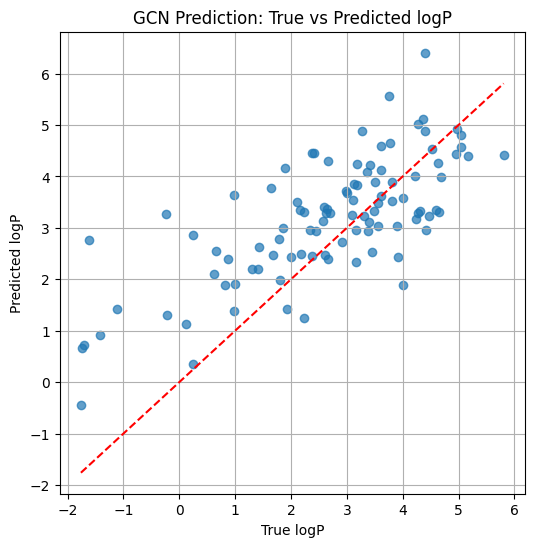

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(true_vals, pred_vals, alpha=0.7)
plt.plot([min(true_vals), max(true_vals)], [min(true_vals), max(true_vals)], 'r--')
plt.xlabel("True logP")
plt.ylabel("Predicted logP")
plt.title("GCN Prediction: True vs Predicted logP")
plt.grid(True)
plt.show()


In [48]:
#Scale to 1000–5000 Molecules (Required for scientific relevance)
smiles_list = df['smiles'][:5000].tolist()
logp_list = df['logP'][:5000].tolist()


In [49]:
import torch.nn as nn
import dgl
from dgl.nn.pytorch import GraphConv

class GCNMultiRegressor(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats=3):  # 3 outputs: logP, qed, SAS
        super(GCNMultiRegressor, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_feats)
        self.conv2 = GraphConv(hidden_feats, hidden_feats)
        self.readout = nn.Linear(hidden_feats, out_feats)

    def forward(self, g, features):
        x = self.conv1(g, features)
        x = torch.relu(x)
        x = self.conv2(g, x)
        g.ndata['h'] = x
        hg = dgl.mean_nodes(g, 'h')  # graph-level embedding
        return self.readout(hg)


In [50]:
# Suppose your label DataFrame looks like this:
# df[['logP', 'qed', 'SAS']]

labels = df[['logP', 'qed', 'SAS']].iloc[:len(graphs)].values  # shape (N, 3)

from torch.utils.data import Dataset

class MultiPropertyDataset(Dataset):
    def __init__(self, graphs, labels):
        self.graphs = graphs
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx], self.labels[idx]

dataset = MultiPropertyDataset(graphs, labels)


In [51]:
in_feats = graphs[0].ndata['h'].shape[1]
model = GCNMultiRegressor(in_feats=in_feats, hidden_feats=64, out_feats=3)


In [52]:
#Prepare the Labels for 3 Outputs
# Step 1: Extract logP, qed, SAS for the same molecules used in graph generation
labels = df[['logP', 'qed', 'SAS']].iloc[:len(graphs)].values

# Confirm shape
print("Labels shape:", labels.shape)
print("First label:", labels[0])


Labels shape: (100, 3)
First label: [5.0506     0.70201223 2.08409457]


In [53]:
from torch.utils.data import Dataset
import torch

class MultiPropertyDataset(Dataset):
    def __init__(self, graphs, labels):
        self.graphs = graphs
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx], self.labels[idx]

# Create the dataset
dataset = MultiPropertyDataset(graphs, labels)

# Test one sample
g, y = dataset[0]
print("Graph:", g)
print("Label:", y)


Graph: Graph(num_nodes=24, num_edges=52,
      ndata_schemes={'h': Scheme(shape=(64,), dtype=torch.float32)}
      edata_schemes={'e': Scheme(shape=(4,), dtype=torch.float32)})
Label: tensor([5.0506, 0.7020, 2.0841])


In [54]:
#Define the Multi-Output GCN Model
import torch.nn as nn
import dgl
from dgl.nn.pytorch import GraphConv

class GCNMultiRegressor(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats=3):
        super(GCNMultiRegressor, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_feats)
        self.conv2 = GraphConv(hidden_feats, hidden_feats)
        self.readout = nn.Linear(hidden_feats, out_feats)

    def forward(self, g, features):
        x = self.conv1(g, features)
        x = torch.relu(x)
        x = self.conv2(g, x)
        g.ndata['h'] = x
        hg = dgl.mean_nodes(g, 'h')  # Graph-level representation
        return self.readout(hg)


In [55]:
# Automatically get input feature size from one graph
in_feats = graphs[0].ndata['h'].shape[1]

# Create the model
model = GCNMultiRegressor(in_feats=in_feats, hidden_feats=64, out_feats=3)

# Check output shape for one example
g, y = dataset[0]
with torch.no_grad():
    output = model(g, g.ndata['h'])
print("Model output:", output)


Model output: tensor([[-0.4428, -0.1777, -0.1150]])


In [56]:
# Step 1: Strip SMILES and slice top 100
df['smiles'] = df['smiles'].str.strip()
smiles_list = df['smiles'][:100].tolist()
logp_list = df['logP'][:100].tolist()
qed_list = df['qed'][:100].tolist()
sas_list = df['SAS'][:100].tolist()

labels = df[['logP', 'qed', 'SAS']].iloc[:100].values  # shape (100, 3)


In [57]:
from dgllife.utils import smiles_to_bigraph
from dgllife.utils import BaseAtomFeaturizer, BaseBondFeaturizer
from dgllife.utils.featurizers import atom_type_one_hot, bond_type_one_hot
from tqdm import tqdm

atom_f = BaseAtomFeaturizer({'h': atom_type_one_hot})
bond_f = BaseBondFeaturizer({'e': bond_type_one_hot})

graphs = []
valid_labels = []

for smi, label in tqdm(zip(smiles_list, labels), total=len(smiles_list)):
    try:
        g = smiles_to_bigraph(smi,
                              add_self_loop=False,
                              node_featurizer=atom_f,
                              edge_featurizer=bond_f)
        graphs.append(g)
        valid_labels.append(label)
    except:
        continue


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 174.24it/s]


In [60]:
torch.tensor(labels, dtype=torch.float32)


tensor([[ 5.0506,  0.7020,  2.0841],
        [ 3.1137,  0.9290,  3.4320],
        [ 4.9678,  0.5997,  2.4706],
        [ 4.0002,  0.6909,  2.8228],
        [ 3.6096,  0.7890,  4.0352],
        [ 2.6374,  0.8244,  5.0914],
        [ 0.9978,  0.3273,  2.8523],
        [ 2.3347,  0.6876,  2.6279],
        [ 4.2813,  0.4831,  3.0739],
        [ 0.8801,  0.8350,  3.9479],
        [ 5.8076,  0.5331,  3.1732],
        [ 3.4174,  0.6454,  2.6923],
        [ 2.3794,  0.8731,  2.7332],
        [ 3.6157,  0.7978,  3.3504],
        [ 1.8118,  0.7873,  3.0776],
        [ 0.6130,  0.5251,  3.1125],
        [ 4.2250,  0.5770,  2.4290],
        [ 2.1622,  0.8001,  2.0379],
        [ 3.3920,  0.3295,  2.6222],
        [ 3.8036,  0.7885,  2.9405],
        [ 2.2362,  0.8255,  3.8783],
        [ 3.8110,  0.6918,  2.5457],
        [ 1.4190,  0.6586,  3.1944],
        [-0.2124,  0.7766,  2.1086],
        [ 3.0944,  0.7104,  2.3088],
        [ 2.6957,  0.9097,  2.5956],
        [ 1.4169,  0.7519,  2.9068],
 

In [64]:
import numpy as np
import torch
from torch.utils.data import Dataset

class MultiPropertyDataset(Dataset):
    def __init__(self, graphs, labels):
        self.graphs = graphs
        self.labels = torch.tensor(np.array(labels), dtype=torch.float32)  # ✅ correct usage of self inside class

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx], self.labels[idx]

# ✅ Create dataset instance
dataset = MultiPropertyDataset(graphs, valid_labels)


In [65]:
len(dataset)


100

In [66]:
from torch.utils.data import DataLoader
import torch.nn as nn

# Recreate model
in_feats = graphs[0].ndata['h'].shape[1]
model = GCNMultiRegressor(in_feats=in_feats, hidden_feats=64, out_feats=3)

# Training setup
epochs = 50
batch_size = 8
learning_rate = 0.01
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# DataLoader
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: list(zip(*x)))

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch_graphs, batch_labels in loader:
        batch_graphs = list(batch_graphs)
        batch_labels = torch.stack(batch_labels)  # (batch_size, 3)

        batched_graph = dgl.batch(batch_graphs)
        feats = torch.cat([g.ndata['h'] for g in batch_graphs])

        preds = model(batched_graph, feats)

        loss = loss_fn(preds, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch:02d} | Loss: {total_loss:.4f}")


Epoch 00 | Loss: 34.5978
Epoch 01 | Loss: 16.5210
Epoch 02 | Loss: 15.0932
Epoch 03 | Loss: 14.8612
Epoch 04 | Loss: 14.3578
Epoch 05 | Loss: 13.0184
Epoch 06 | Loss: 14.1818
Epoch 07 | Loss: 13.5897
Epoch 08 | Loss: 13.7352
Epoch 09 | Loss: 12.4411
Epoch 10 | Loss: 11.9172
Epoch 11 | Loss: 11.7792
Epoch 12 | Loss: 12.7714
Epoch 13 | Loss: 11.5556
Epoch 14 | Loss: 9.7452
Epoch 15 | Loss: 9.8103
Epoch 16 | Loss: 10.5856
Epoch 17 | Loss: 11.5765
Epoch 18 | Loss: 12.5190
Epoch 19 | Loss: 10.5343
Epoch 20 | Loss: 11.0636
Epoch 21 | Loss: 9.7935
Epoch 22 | Loss: 9.5296
Epoch 23 | Loss: 10.3083
Epoch 24 | Loss: 11.3287
Epoch 25 | Loss: 11.4515
Epoch 26 | Loss: 9.6071
Epoch 27 | Loss: 9.5355
Epoch 28 | Loss: 9.5157
Epoch 29 | Loss: 8.9865
Epoch 30 | Loss: 9.2175
Epoch 31 | Loss: 8.7834
Epoch 32 | Loss: 8.4158
Epoch 33 | Loss: 8.5743
Epoch 34 | Loss: 8.7155
Epoch 35 | Loss: 9.0092
Epoch 36 | Loss: 8.3659
Epoch 37 | Loss: 9.4080
Epoch 38 | Loss: 10.0137
Epoch 39 | Loss: 10.8072
Epoch 40 | Loss:

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score

model.eval()
true_vals = []
pred_vals = []

for graph, label in dataset:
    with torch.no_grad():
        pred = model(graph, graph.ndata['h'])
    true_vals.append(label.numpy())
    pred_vals.append(pred.numpy()[0])

# Convert to NumPy arrays
import numpy as np
true_vals = np.array(true_vals)
pred_vals = np.array(pred_vals)

# Evaluate each property separately
props = ['logP', 'qed', 'SAS']
for i in range(3):
    mae = mean_absolute_error(true_vals[:, i], pred_vals[:, i])
    r2 = r2_score(true_vals[:, i], pred_vals[:, i])
    print(f"{props[i]} - MAE: {mae:.4f} | R²: {r2:.4f}")


logP - MAE: 0.9266 | R²: 0.5014
qed - MAE: 0.1274 | R²: 0.1009
SAS - MAE: 0.5069 | R²: 0.1881


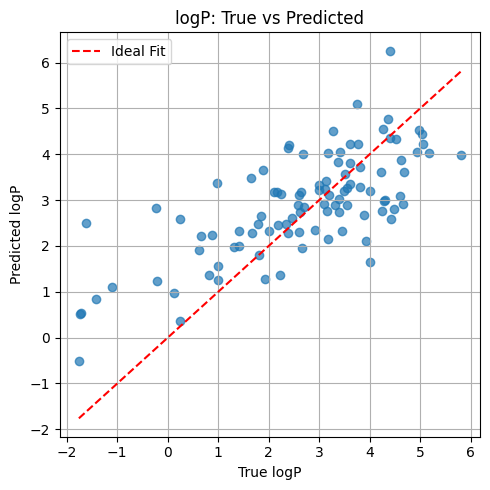

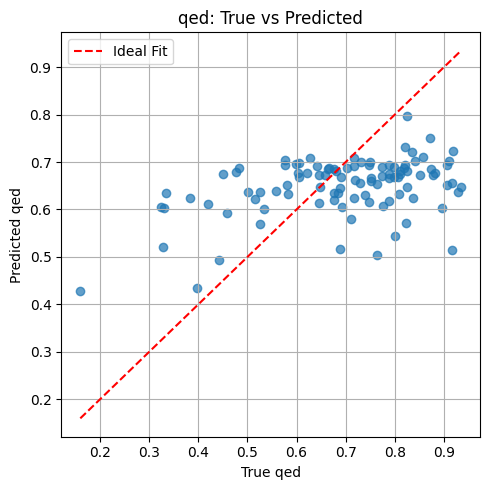

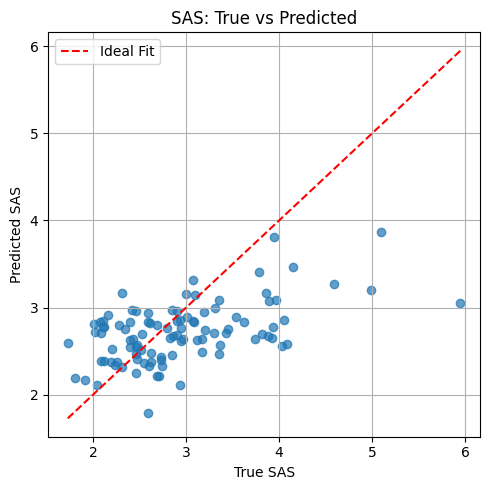

In [68]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure(figsize=(5,5))
    plt.scatter(true_vals[:, i], pred_vals[:, i], alpha=0.7)
    plt.plot([min(true_vals[:, i]), max(true_vals[:, i])],
             [min(true_vals[:, i]), max(true_vals[:, i])],
             'r--', label='Ideal Fit')
    plt.xlabel(f"True {props[i]}")
    plt.ylabel(f"Predicted {props[i]}")
    plt.title(f"{props[i]}: True vs Predicted")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [69]:
torch.save(model.state_dict(), "gcn_multitask_model.pt")
print("✅ Model saved as gcn_multitask_model.pt")


✅ Model saved as gcn_multitask_model.pt


In [70]:
# Strip and slice first 1000 SMILES
df['smiles'] = df['smiles'].str.strip()
smiles_list = df['smiles'][:1000].tolist()
labels_3props = df[['logP', 'qed', 'SAS']].iloc[:1000].values


In [71]:
from dgllife.utils import smiles_to_bigraph
from dgllife.utils import BaseAtomFeaturizer, BaseBondFeaturizer
from dgllife.utils.featurizers import atom_type_one_hot, bond_type_one_hot
from tqdm import tqdm

atom_f = BaseAtomFeaturizer({'h': atom_type_one_hot})
bond_f = BaseBondFeaturizer({'e': bond_type_one_hot})

graphs = []
valid_labels = []

for smi, label in tqdm(zip(smiles_list, labels_3props), total=len(smiles_list)):
    try:
        g = smiles_to_bigraph(smi,
                              add_self_loop=False,
                              node_featurizer=atom_f,
                              edge_featurizer=bond_f)
        graphs.append(g)
        valid_labels.append(label)
    except:
        continue

print("✅ Number of valid graphs:", len(graphs))


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 203.97it/s]

✅ Number of valid graphs: 1000


In [72]:
import numpy as np
import torch
from torch.utils.data import Dataset

class MultiPropertyDataset(Dataset):
    def __init__(self, graphs, labels):
        self.graphs = graphs
        self.labels = torch.tensor(np.array(labels), dtype=torch.float32)

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx], self.labels[idx]

# Create dataset with 1000 molecules
dataset = MultiPropertyDataset(graphs, valid_labels)
print("✅ Dataset size:", len(dataset))


✅ Dataset size: 1000


In [73]:
from torch.utils.data import DataLoader
import torch.nn as nn

# Step: Reinitialize model for fresh training
in_feats = graphs[0].ndata['h'].shape[1]
model = GCNMultiRegressor(in_feats=in_feats, hidden_feats=64, out_feats=3)

# Hyperparameters
epochs = 50
batch_size = 32
learning_rate = 0.001

# Loss & optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Dataloader
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: list(zip(*x)))

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch_graphs, batch_labels in loader:
        batch_graphs = list(batch_graphs)
        batch_labels = torch.stack(batch_labels)

        batched_graph = dgl.batch(batch_graphs)
        feats = torch.cat([g.ndata['h'] for g in batch_graphs])

        preds = model(batched_graph, feats)

        loss = loss_fn(preds, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch:02d} | Loss: {total_loss:.4f}")


Epoch 00 | Loss: 169.6536
Epoch 01 | Loss: 55.3308
Epoch 02 | Loss: 30.6456
Epoch 03 | Loss: 29.9164
Epoch 04 | Loss: 29.2965
Epoch 05 | Loss: 28.8685
Epoch 06 | Loss: 28.4302
Epoch 07 | Loss: 28.3837
Epoch 08 | Loss: 27.7730
Epoch 09 | Loss: 28.3263
Epoch 10 | Loss: 27.0597
Epoch 11 | Loss: 26.3576
Epoch 12 | Loss: 26.3467
Epoch 13 | Loss: 25.2386
Epoch 14 | Loss: 24.1145
Epoch 15 | Loss: 23.3925
Epoch 16 | Loss: 23.7569
Epoch 17 | Loss: 23.0260
Epoch 18 | Loss: 22.8546
Epoch 19 | Loss: 22.3288
Epoch 20 | Loss: 22.1653
Epoch 21 | Loss: 22.3025
Epoch 22 | Loss: 22.2321
Epoch 23 | Loss: 22.0712
Epoch 24 | Loss: 22.5435
Epoch 25 | Loss: 22.5720
Epoch 26 | Loss: 23.1366
Epoch 27 | Loss: 22.2524
Epoch 28 | Loss: 21.8991
Epoch 29 | Loss: 21.7043
Epoch 30 | Loss: 21.7144
Epoch 31 | Loss: 22.1439
Epoch 32 | Loss: 21.6787
Epoch 33 | Loss: 21.5457
Epoch 34 | Loss: 21.7778
Epoch 35 | Loss: 21.7476
Epoch 36 | Loss: 21.8165
Epoch 37 | Loss: 21.6713
Epoch 38 | Loss: 21.3764
Epoch 39 | Loss: 21.3508

In [74]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

model.eval()
true_vals = []
pred_vals = []

for graph, label in dataset:
    with torch.no_grad():
        pred = model(graph, graph.ndata['h'])
    true_vals.append(label.numpy())
    pred_vals.append(pred.numpy()[0])  # from shape (1, 3) → (3,)

true_vals = np.array(true_vals)
pred_vals = np.array(pred_vals)

# Evaluate for each property
props = ['logP', 'qed', 'SAS']
for i in range(3):
    mae = mean_absolute_error(true_vals[:, i], pred_vals[:, i])
    r2 = r2_score(true_vals[:, i], pred_vals[:, i])
    print(f"{props[i]} → MAE: {mae:.4f} | R²: {r2:.4f}")


logP → MAE: 0.9265 | R²: 0.3703
qed → MAE: 0.1114 | R²: 0.0048
SAS → MAE: 0.6165 | R²: 0.0675


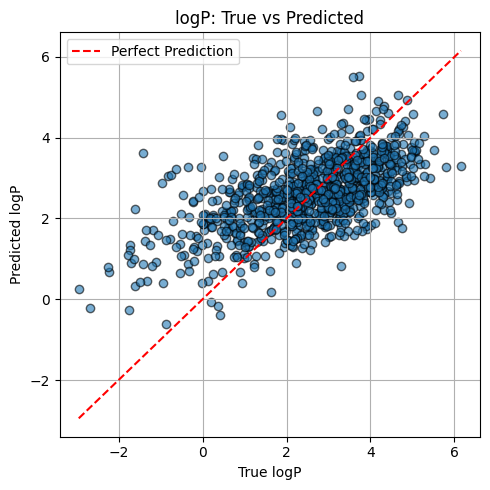

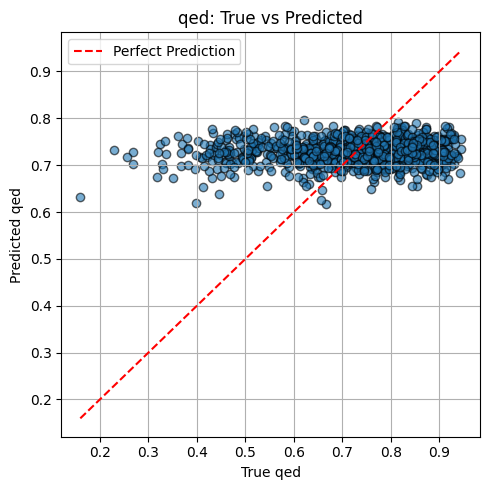

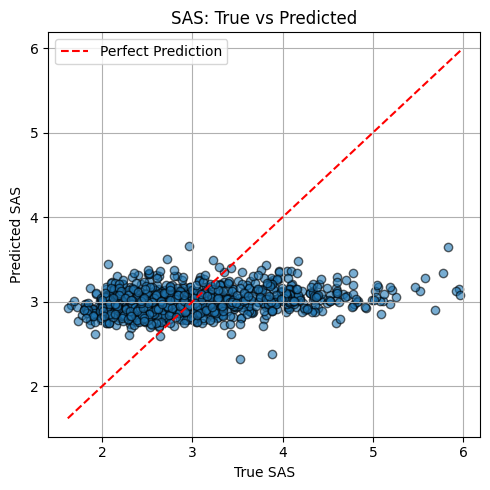

In [75]:
import matplotlib.pyplot as plt

props = ['logP', 'qed', 'SAS']

for i in range(3):
    plt.figure(figsize=(5, 5))
    plt.scatter(true_vals[:, i], pred_vals[:, i], alpha=0.6, edgecolors='k')
    plt.plot([min(true_vals[:, i]), max(true_vals[:, i])],
             [min(true_vals[:, i]), max(true_vals[:, i])],
             'r--', label='Perfect Prediction')

    plt.xlabel(f"True {props[i]}")
    plt.ylabel(f"Predicted {props[i]}")
    plt.title(f"{props[i]}: True vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [76]:
torch.save(model.state_dict(), "gcn_multitask_model_1000.pt")
print("✅ Model saved as gcn_multitask_model_1000.pt")


✅ Model saved as gcn_multitask_model_1000.pt


In [1]:
!pip install streamlit


In [2]:
!pip install rdkit-pypi


In [3]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)